## Support Vector Regressor Implementation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[-0.0143966 ,  0.7761593 ],
       [-0.9421806 , -1.31829598],
       [ 0.46293148, -0.09046331],
       ...,
       [-0.43329451, -1.28492035],
       [ 0.19852197,  2.36368106],
       [ 0.41560366, -1.49171644]])

In [6]:
y

array([ 2.17078668e+01, -9.30647263e+01,  2.70548827e+01, -3.82863504e-01,
        2.60972766e+01, -3.89017225e+01,  6.51172249e+01,  5.97808558e+01,
       -2.44662068e+01,  1.65661195e+01,  3.70718279e+01,  3.95094352e+01,
       -2.90801699e+01, -3.20397462e+01, -6.34504349e+01,  8.40172397e+00,
        5.87744166e+01,  8.07672811e+01,  3.75493768e+01,  4.98743747e+01,
        7.75067567e+01,  4.83769621e+01, -5.72528666e+01,  1.94340503e+01,
       -7.00429937e+00, -7.80374571e+01, -1.40242581e+01, -1.71877825e+01,
        4.37030268e+01,  3.81042197e+01, -2.42945684e+01, -8.03070967e+01,
       -7.77577223e+01, -9.04089553e+01,  1.44571072e+02,  9.47688437e+01,
        2.51299527e+01, -5.92763232e+01, -3.80042065e+01,  3.27825059e+01,
       -1.46804699e+01, -5.73882190e+01,  2.88296378e+01, -2.88462987e+01,
        1.05716340e+02, -8.91092438e+00, -9.24898257e+01,  9.05541861e+00,
       -1.07863995e+02, -1.16932498e+02, -9.52659865e-01,  6.62446954e+01,
       -8.11713416e+00,  

In [ ]:
pd.DataFrame(X)[0]

<AxesSubplot: xlabel='0', ylabel='1'>

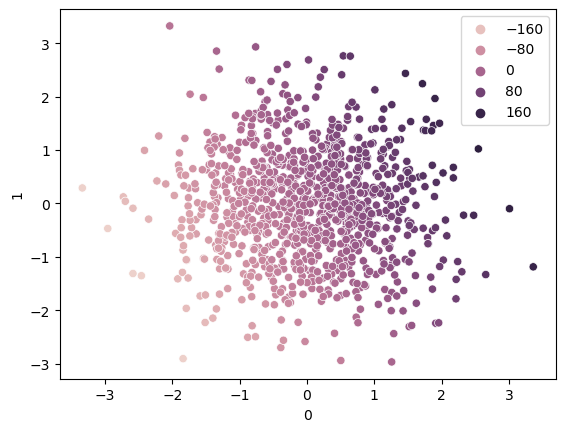

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[58.23284096, 25.92588646]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([ -14.35353768,  -81.49245837,   88.69446831,   12.56134922,
        -27.45151746,  -89.29823899,  126.74492134,   44.80109604,
         42.76694499,   21.1537563 ,   49.00706793,   27.5458348 ,
        -78.00579704,   76.61803344,   18.127377  ,   49.83808406,
       -156.22364681,   33.36484391,  -48.23143709,    1.1203182 ,
        -68.39318679,  113.43285087,  -13.50773475,   21.7794178 ,
         73.2063337 ,   57.67721855, -141.30358864,  -39.34354525,
         -1.05100842,    9.43798609,   14.75918472,    7.86761924,
         15.2355997 ,   34.8109859 ,  -13.89054907, -137.46604999,
        -68.8390699 ,  -71.46068937,   15.91058225,  -58.28719383,
         53.06311881,  -34.8029211 ,  -13.86753205,   58.60928   ,
         38.52512728,  -25.57433948,   71.69867407,   28.7470747 ,
         -0.64547457,   25.86923024,  -12.77438419, -129.94857449,
          5.35142895,  -26.92371809, -139.13135328,  -41.58141789,
        -59.55672079,  -70.19586668,   65.03103966,  -55.52887

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9979607988463266


## Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.897 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.921 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.910 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.897 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.910 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.921 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.913 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9980005324622105
